# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data

In [10]:
dataset=pd.read_csv('Ecommerce Customers.csv')
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


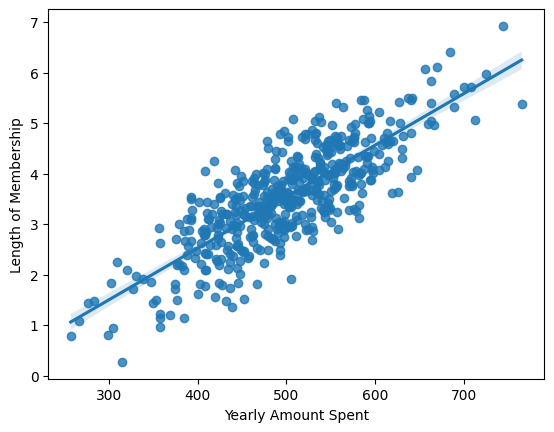

In [4]:
sns.regplot(x="Yearly Amount Spent", y="Length of Membership", data=dataset);

In [5]:
x = dataset.iloc[:, 3:-1].values  # get all row data for 'Avg Session Length','Time on App','Time on Website' and 'Length of Membership'
y = dataset.iloc[:, -1].values  # get the last column depentant variable data for all rows

In [21]:
features=len(x[1])

In [6]:
print(x[:10,:])

[[34.49726773 12.65565115 39.57766802  4.08262063]
 [31.92627203 11.10946073 37.26895887  2.66403418]
 [33.00091476 11.33027806 37.11059744  4.1045432 ]
 [34.30555663 13.71751367 36.72128268  3.12017878]
 [33.33067252 12.79518855 37.5366533   4.44630832]
 [33.87103788 12.02692534 34.47687763  5.4935072 ]
 [32.0215955  11.36634831 36.68377615  4.68501725]
 [32.73914294 12.35195897 37.37335886  4.43427343]
 [33.9877729  13.38623528 37.53449734  3.27343358]
 [31.93654862 11.81412829 37.14516822  3.20280607]]


In [7]:
print(y[:10])

[587.95105397 392.20493344 487.54750487 581.85234404 599.40609205
 637.10244792 521.57217476 549.90414611 570.20040896 427.1993849 ]


# Data Preprocessing

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# fit method will look for missing values and calulate mean for 1st and 2nd columns
imputer.fit(x[:,:])
# transform method will replace missign value with calulated value in 1st(age) and 2nd(salary) columns
x[:,:]=imputer.transform(x[:,:])

In [9]:
print(x[:10,:])

[[34.49726773 12.65565115 39.57766802  4.08262063]
 [31.92627203 11.10946073 37.26895887  2.66403418]
 [33.00091476 11.33027806 37.11059744  4.1045432 ]
 [34.30555663 13.71751367 36.72128268  3.12017878]
 [33.33067252 12.79518855 37.5366533   4.44630832]
 [33.87103788 12.02692534 34.47687763  5.4935072 ]
 [32.0215955  11.36634831 36.68377615  4.68501725]
 [32.73914294 12.35195897 37.37335886  4.43427343]
 [33.9877729  13.38623528 37.53449734  3.27343358]
 [31.93654862 11.81412829 37.14516822  3.20280607]]


# Splitting the dataset into training and test set  

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state


In [12]:
print(x_train[:10,:])

[[31.85125313 12.41896198 35.97765171  3.25174177]
 [34.18818406 13.13002166 35.42933439  3.79055214]
 [33.35839828 12.70368793 36.10091445  2.7241082 ]
 [32.0609144  12.62543264 35.53914243  5.41235784]
 [33.26833022 11.1133299  37.38794554  4.01872661]
 [31.53160448 13.37856278 38.73400629  2.24514779]
 [32.43075793 11.30623234 37.68040323  2.77952072]
 [32.91278511 11.36549203 37.60779252  4.59993736]
 [33.58737339  9.95399501 37.34573893  3.21566683]
 [32.38797585 13.14872569 36.61995708  2.49454365]]


In [13]:
print(x_test[:10,:])

[[32.4914466  12.53035737 37.8752191   2.47613905]
 [32.7111193  12.32629139 36.67387836  3.35027929]
 [33.07773079 11.46698422 35.67572763  1.80922959]
 [32.21292383 11.73299146 35.63395395  4.33186303]
 [32.77049216 11.37176736 35.26149812  4.03438613]
 [30.73772037 12.63660605 36.21376309  3.35784684]
 [33.56647439 12.23565925 37.27757338  2.53204406]
 [32.24635    11.30555143 37.13312676  1.70738973]
 [34.56868085 11.37808709 38.30447119  3.78493211]
 [31.94539575 12.96576148 36.9663889   6.07665364]]


In [14]:
print(y_train[:10])

[472.99224667 583.97780197 482.35357032 627.60331871 514.23952072
 436.51560573 408.62018783 534.70574381 410.60294395 470.4527333 ]


In [15]:
print(y_test[:10])

[449.07031944 482.60246733 374.26967454 513.15311185 502.77107457
 461.7807422  466.42119882 327.37795259 528.22380937 657.01992394]


# Build Model

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
#predicting the test set results
y_pred = regressor.predict(x_test)

# Evaluate Model Using R_Square

The R-squared value is a measure of how well the predicted values match the actual values. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9849262667370623

Remember that the R-squared score ranges from 0 to 1, where a higher value indicates a better fit of the model to the data

#Adjusted R SQUARE

The adjusted R-squared (or adjusted coefficient of determination) is a modified version of the regular R-squared that takes into account the number of predictors (features) in a regression model. It addresses a potential issue with R-squared by penalizing the inclusion of unnecessary predictors that might not significantly contribute to explaining the variance in the dependent variable.

In [23]:
def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2

# Assuming you have 'y_test' as true target values and 'y_pred' as predicted values
n = len(y_test)  # Number of data points
k = features  # Number of predictors (features)

adjusted_r2 = adjusted_r2_score(y_test, y_pred, n, k)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9845104396125675


The intuition behind the adjusted R-squared is to strike a balance between model complexity and goodness of fit. It helps to mitigate the problem of overfitting by adjusting the R-squared value based on the number of predictors in the model.